<a href="https://colab.research.google.com/github/xunzxe/first-repository/blob/master/Datathon/Cluster_analysis_Archery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 가져오기

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans
import math

In [ ]:
# 데이터셋 pandas로 불러오기

athlete_path = "/content/athlete_events.csv"
athlete_data = pd.read_csv(athlete_path)
athlete = athlete_data.copy()
print(athlete.shape)
athlete.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# 결측치 처리하기

athlete['Medal'].fillna('No', inplace=True)
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No


In [ ]:
# 하계 올림픽 데이터셋

summer = athlete[athlete["Season"] == "Summer"].reset_index(drop=True)
print(summer.shape)
print(len(set(summer["Sport"])))
summer.head()

(222552, 15)
52


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No


In [ ]:
archery = summer[summer["Sport"] == "Wrestling"].reset_index(drop=True)
archery.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,23,Fritz Aanes,M,22.0,187.0,89.0,Norway,NOR,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No
1,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No
2,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,EST,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",No
3,50,Arvi Aavik,M,26.0,185.0,106.0,Estonia,EST,1996 Summer,1996,Summer,Atlanta,Wrestling,"Wrestling Men's Heavyweight, Freestyle",No
4,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
5,87,Rost'om Omeris dze Abashidze,M,29.0,188.0,97.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No
6,155,Mohamed Ibrahim Abd El-Fatah Mohamed,M,22.0,185.0,98.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No
7,155,Mohamed Ibrahim Abd El-Fatah Mohamed,M,26.0,185.0,98.0,Egypt,EGY,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No
8,155,Mohamed Ibrahim Abd El-Fatah Mohamed,M,34.0,185.0,98.0,Egypt,EGY,2012 Summer,2012,Summer,London,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",No
9,190,Ibrahim Abdel Hamid,M,NaN,NaN,NaN,Egypt,EGY,1948 Summer,1948,Summer,London,Wrestling,"Wrestling Men's Featherweight, Freestyle",No


In [ ]:
# 'Archery' 선수 정보로 이루어진 데이터셋 만들기

archery = summer[summer["Sport"] == "Archery"].reset_index(drop=True)
X = archery[['Sex', 'Age', 'Height', 'Weight', 'Year','Medal']]
X = X.dropna()
medal_mapping = {'No': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3}
X['Medal'] = X['Medal'].map(medal_mapping)

print(X.shape)
X.head(30)

(1883, 6)


,Sex,Age,Height,Weight,Year,Medal
0,F,40.0,165.0,57.0,2008,0
2,M,24.0,176.0,70.0,2008,0
3,M,24.0,176.0,70.0,2008,0
4,F,25.0,160.0,57.0,2008,0
7,F,38.0,169.0,68.0,1976,0
8,F,22.0,170.0,61.0,1980,0
9,F,26.0,170.0,61.0,1984,0
10,F,30.0,170.0,61.0,1988,0
11,F,20.0,160.0,59.0,2016,0
12,F,20.0,160.0,59.0,2016,0


In [ ]:
# 여성 데이터셋
X_female = X[X["Sex"] == "F"].reset_index(drop=True)
X_female = X_female[['Age', 'Height', 'Weight', 'Year','Medal']]
print(X_female.shape)
X_female.head(30)

(883, 5)


,Age,Height,Weight,Year,Medal
0,40.0,165.0,57.0,2008,0
1,25.0,160.0,57.0,2008,0
2,38.0,169.0,68.0,1976,0
3,22.0,170.0,61.0,1980,0
4,26.0,170.0,61.0,1984,0
5,30.0,170.0,61.0,1988,0
6,20.0,160.0,59.0,2016,0
7,20.0,160.0,59.0,2016,0
8,17.0,160.0,50.0,2012,0
9,19.0,170.0,80.0,1996,0


In [ ]:
# 최적의 군집수 찾기
# 'kmeans.inertia_'는 군집의 중심과 각 개체 간의 거리를 계산.
# 중심과 개체간의 거리가 작아진다는 것은 그만큼 군집이 잘 형성이 되었다는 것.

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(X_female)
    wcss.append(kmeans.inertia_)

wcss

[245923.59909399773,
 156487.48091863515,
 126992.31088897343,
 111131.84906232265,
 99993.46560804656,
 90921.89568215403,
 83662.33610603047,
 77300.27589897891,
 72170.72132675763,
 67763.75364979866,
 64140.41820247553,
 61110.13625581915,
 59178.06231078027,
 56598.84837142568,
 54342.64337421637,
 52385.754081463645,
 50356.56016028263,
 48990.6947337929,
 48043.162377112254,
 46183.91664595656]

<function matplotlib.pyplot.show(close=None, block=None)>

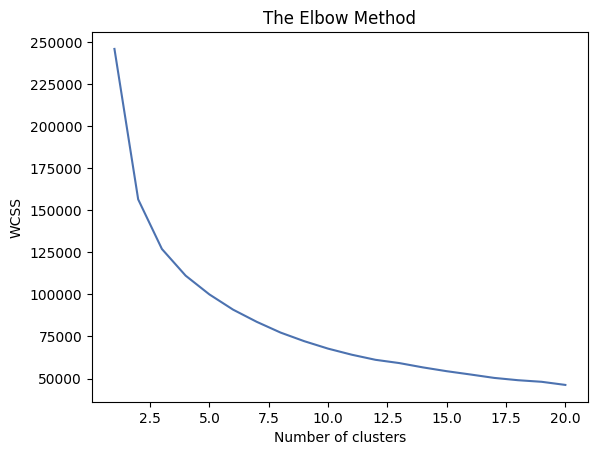

In [ ]:
# 꺽은선 도표로 보기
plt.figure()
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
# 군집수 k = 4 결정 후 모델 학습과 예측
k = 4
kmeans = KMeans(n_clusters=k)
y_kmeans = kmeans.fit_predict(X_female)
y_kmeans

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 3, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3,
       3, 1, 1, 0, 0, 0, 1, 0, 3, 3, 3, 1, 1, 1, 1, 3, 0, 0, 2, 2, 3, 3,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 3, 2,
       2, 2, 2, 0, 0, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 0, 0, 3, 3, 1, 1, 3,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 3, 3, 0, 0, 3, 3,
       2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3,
       3, 3, 3, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 3, 3, 3, 3, 3, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 3, 3, 3, 3, 3,
       3, 3, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 0, 0, 3,
       3, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 0, 0, 3, 3, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 2, 2, 3,

In [ ]:
# 데이터 병합
Group_cluster = pd.DataFrame(y_kmeans, columns=['Group'])
full_data = pd.concat( [X_female, Group_cluster], axis=1)
full_data.head()

,Age,Height,Weight,Year,Medal,Cluster,Color,Group
0,40.0,165.0,57.0,2008,0,2,black,0
1,25.0,160.0,57.0,2008,0,2,black,0
2,38.0,169.0,68.0,1976,0,0,black,1
3,22.0,170.0,61.0,1980,0,0,black,1
4,26.0,170.0,61.0,1984,0,0,black,1


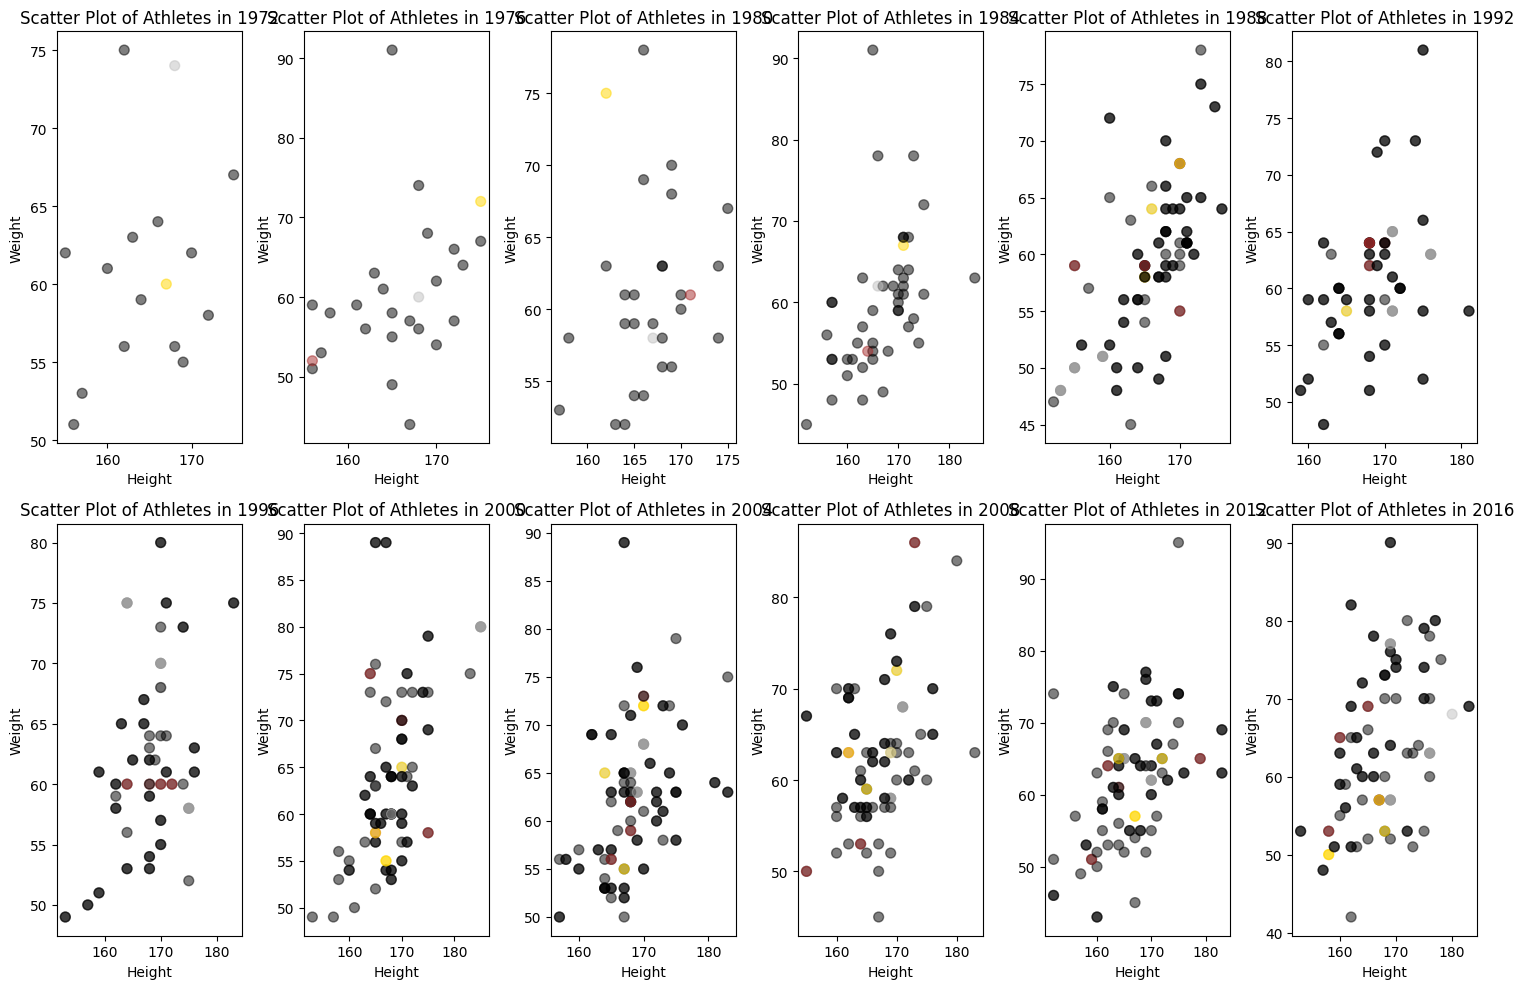

"\n# 클러스터 중심 표시\ncenters = kmeans.cluster_centers_\nplt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.75, marker='X', label='Centers')\n"

In [ ]:
# 군집 모델 적용
kmeans = KMeans(n_clusters=4, random_state=42)
X_female['Cluster'] = kmeans.fit_predict(X_female)

# 색상 설정 (메달 종류에 따라 색상 다르게)
color_mapping = {0: 'black', 1: 'brown', 2: 'silver', 3: 'gold'}
X_female['Color'] = X_female['Medal'].map(color_mapping)

# 산점도 그리기
years = sorted(X_female['Year'].unique())  # 데이터셋에서 사용된 모든 년도 목록
num_plots = len(years)

plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    subset = X_female[X_female['Year'] == year]
    plt.subplot(2, math.ceil(num_plots / 2), i + 1)  # subplot 생성
    plt.scatter(subset['Height'], subset['Weight'], s=50, c=subset['Color'], alpha=0.5)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title(f'Scatter Plot of Athletes in {year}')

plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.tight_layout()
plt.show()

'''
# 클러스터 중심 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=20, alpha=0.75, marker='X', label='Centers')
'''

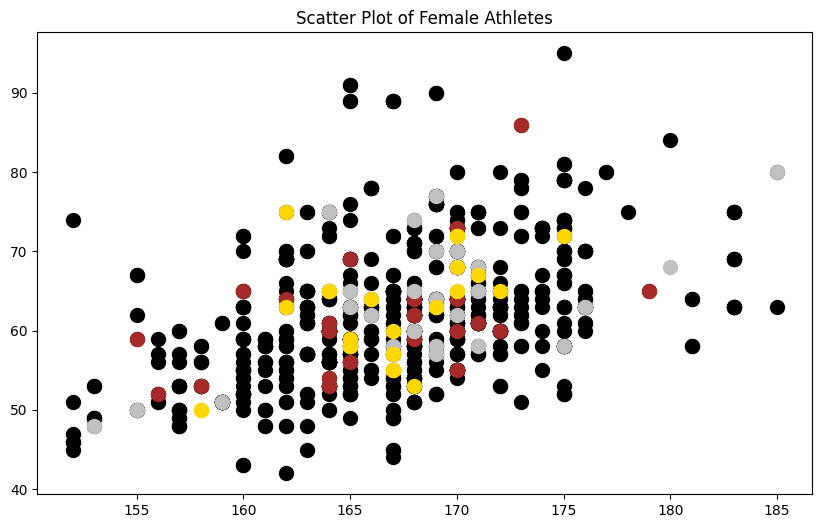

In [ ]:
plt.figure(figsize=(10, 6))
for medal, color in color_mapping.items():
    subset = X_female[X_female['Medal'] == medal]
    plt.scatter(subset['Height'], subset['Weight'], s=100, c=color, label=f'Medal {medal}')
    plt.title('Scatter Plot of Female Athletes')

In [ ]:
# 남성 데이터셋
X_male = X[X["Sex"] == "M"].reset_index(drop=True)
X_male = X_male[['Age', 'Height', 'Weight', 'Year','Medal']]
print(X_male.shape)
X_male.head()

(1000, 5)


,Age,Height,Weight,Year,Medal
0,24.0,176.0,70.0,2008,0
1,24.0,176.0,70.0,2008,0
2,23.0,178.0,58.0,2000,0
3,23.0,178.0,58.0,2000,0
4,33.0,184.0,80.0,1972,0


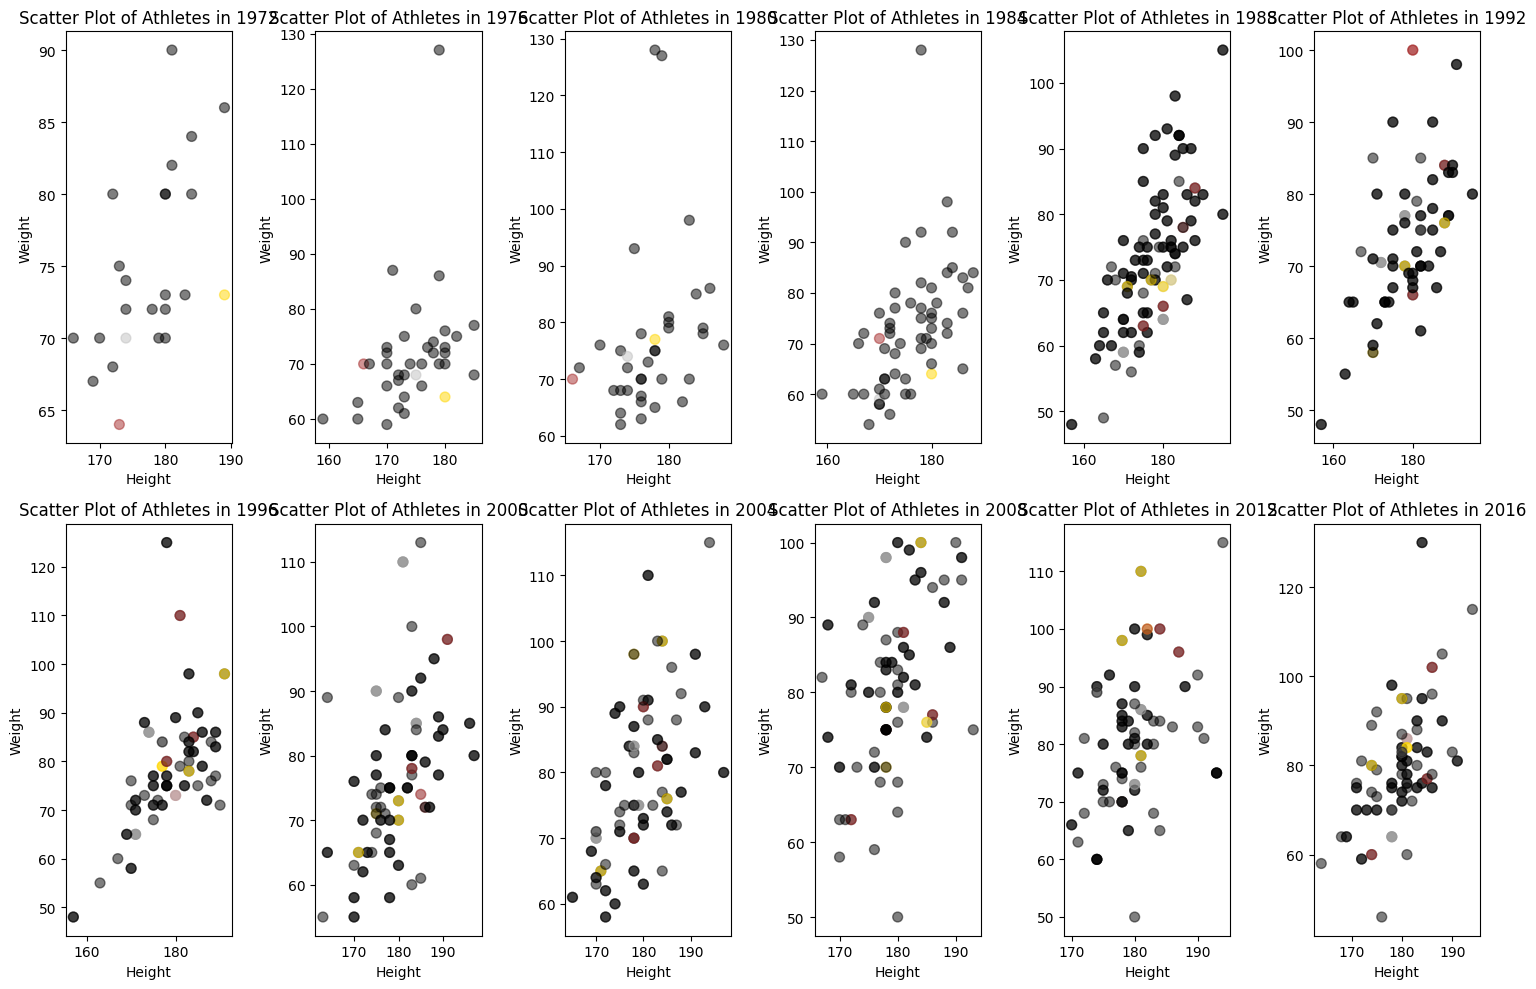

In [ ]:
# 군집 모델 적용
kmeans = KMeans(n_clusters=4, random_state=42)
X_male['Cluster'] = kmeans.fit_predict(X_male)

# 색상 설정 (메달 종류에 따라 색상 다르게)
color_mapping = {0: 'black', 1: 'brown', 2: 'silver', 3: 'gold'}
X_male['Color'] = X_male['Medal'].map(color_mapping)

# 산점도 그리기
years = sorted(X_male['Year'].unique())  # 데이터셋에서 사용된 모든 년도 목록
num_plots = len(years)

plt.figure(figsize=(15, 10))

for i, year in enumerate(years):
    subset = X_male[X_male['Year'] == year]
    plt.subplot(2, math.ceil(num_plots / 2), i + 1)  # subplot 생성
    plt.scatter(subset['Height'], subset['Weight'], s=50, c=subset['Color'], alpha=0.5)
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title(f'Scatter Plot of Athletes in {year}')

plt.subplots_adjust(wspace=0.7, hspace=0.7)
plt.tight_layout()
plt.show()

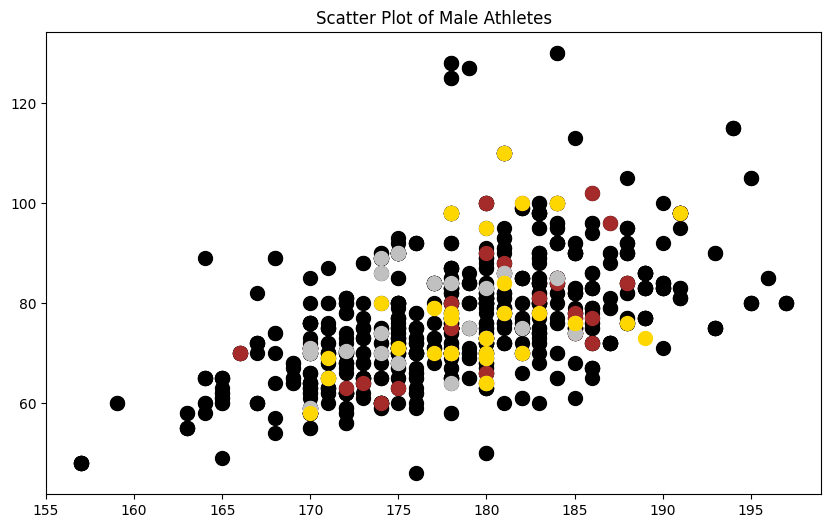

In [ ]:
plt.figure(figsize=(10, 6))
for medal, color in color_mapping.items():
    subset = X_male[X_male['Medal'] == medal]
    plt.scatter(subset['Height'], subset['Weight'], s=100, c=color, label=f'Medal {medal}')
    plt.title('Scatter Plot of Male Athletes')